# ML Challenge - Test models (file 2/4)

This the 2nd of the 4 files. After cleaning and preparing the Sales dataset (stored now in sales_updated) we can now train, evaluate and compare different ML models.

## 1. Import libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.model_selection import train_test_split
import pickle

## 2. Open cleaned data

In [ ]:
sales_updated = pd.read_csv('sales_updated.csv')

## 3. Split train/test data for ML models

### Create labels

In [87]:
features = sales_updated.drop(columns = ['Sales'])
labels = sales_updated['Sales']

### Split train-test data

In [88]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.20, random_state=0) 

## 4. Test models

Because this is a regression problem, the following models are tested below: linear regression, Decission Tree Regressor, K-Neighbors Regressor, Ridge, Lasso. Because the best results are obtained with Decission Tree Regressor, additional steps are taken (apply ensemble methods, tune hyperparameters)

## Model 1: Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(model.score(X_test, y_test))
print(model.score(X_train, y_train))

0.8559353303163477
0.8531388873221701


Results are lower than for other models, like Decission Tree (see below)

## Model 2: Decision tree

In [111]:
from sklearn.tree import DecisionTreeRegressor
model_tree = DecisionTreeRegressor(max_depth=9)
model_tree.fit(X_train, y_train)
pred = model_tree.predict(X_test)
print(model_tree.score(X_test, y_test))
print(model_tree.score(X_train, y_train))


0.8821995044597928
0.8822634190076366


Results are better with this model. Additional steps are taken below to tune it.

### Decission Tree - Checking the max_depth

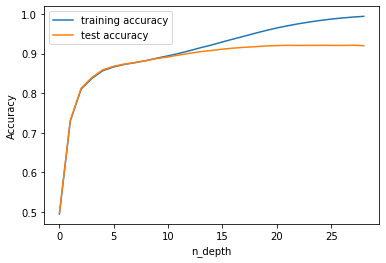

In [97]:
test = []
train = []

max_depth = range(1,30)

for depth in max_depth:
  model_tree = DecisionTreeRegressor(max_depth= depth)
  model_tree.fit(X_train, y_train)
  test.append(model_tree.score(X_test,y_test))
  train.append(model_tree.score(X_train,y_train))
  
plt.plot( train, label="training accuracy")
plt.plot( test, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_depth")
plt.legend()
plt.show()

We quickly see overfitting. The ideal max_depth is somwhere between 9 and 10 (above 10, there's overfitting)

### Decission Tree - Ensemble (Random Forest)

In [110]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100,
            max_depth=9,
            random_state=0)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print(forest.score(X_test, y_test))
print(forest.score(X_train, y_train))


0.8883029120538404
0.8880821157032522


In [ ]:
forest = RandomForestRegressor(n_estimators=150,
            max_depth=10,
            random_state=0)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print(forest.score(X_test, y_test))
print(forest.score(X_train, y_train))

In [115]:
forest = RandomForestRegressor(n_estimators=200,
            max_depth=10,
            random_state=0)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
print(forest.score(X_test, y_test))
print(forest.score(X_train, y_train))

0.8934596164728771
0.8943612088783988


In [ ]:
# I have tried with n_estimators = 300, but increasing the n_estimators does not improve results significantly

### Decission Tree - Ensemble (Gradient Boosting)

In [118]:
from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor(max_depth=9,
            n_estimators=100,
            random_state=0)
gb_reg.fit(X_train, y_train)
pred = gb_reg.predict(X_test)
print(gb_reg.score(X_test, y_test))
print(gb_reg.score(X_train, y_train))

0.952202093238696
0.9549859840134641


Results are significantly better than with Random Forest. File 3 contains more tests to tune the hyperparameters

### Decission Tree - Ensemble (xgboost)

In [125]:
import xgboost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
pred = xgb_reg.predict(X_test)
print(xgb_reg.score(X_test, y_test))
print(xgb_reg.score(X_train, y_train))

0.9604316852898588
0.9619109094852552


xgboost also gives high scores. I pickle the trained model as an alternative option to Gradient Boosting

In [126]:
import pickle
pickle.dump(xgb_reg, open('model_xgboost.p', 'wb'))

## Model 3: K-Neighbors Regressor

In [104]:
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=5) 
model_knn.fit(X_train, y_train)
pred = model_knn.predict(X_test)
print(model_knn.score(X_test, y_test))
print(model_knn.score(X_train, y_train))

0.8724456024749245
0.9163492233959231


KNN overfits quickly. Plus, we may need to normalize the data before

## Model 4: Ridge regression

In [106]:
from sklearn.linear_model import Ridge
model_r = Ridge()
model_r.fit(X_train, y_train)
pred = model_r.predict(X_test)
print(model_r.score(X_test, y_test))
print(model_r.score(X_train, y_train))

0.8559353240924027
0.8531388872978602


Scores are lower. I continue exploring the options of Gradient Boosting and xgboost